# Wrangle and Analyze WeRateDogs Data

### Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
    <li><a href="#gathering">Gathering Data</a></li>
    <li><a href="#assessing">Assessing Data</a></li>
        <ul>
          <li><a href="#issues">Identified Issues</a></li>
        </ul>
    <li><a href="#cleaning">Cleaning Data</a></li>
    </ul>
<li><a href="#sav">Store, Analyze and Visualize</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

"The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage."

#### Import

In [101]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import datetime as dt
import seaborn as sns
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns
# To see all columns in datasets in order to help visual assessment
pd.set_option('display.max_columns', 100)

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check it for cleanliness, and then trim and clean the datasets for analysis. 

<a id='gathering'></a>
### Gathering Data

#### Enhanced WeRateDogs Twitter Archive 

In [3]:
# Read in the dataset
enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')

#### Dog Breed Prediction Based Off of Images

In [4]:
# Create folder if it doesn't already exist
folder_name = 'tweet_image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
# Load dataset and check response
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response.status_code

200

In [6]:
# Add data to folder
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
# Read in tsv as csv
predictions_df = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')

#### WeRateDogs Twitter Archieve via API

In [8]:
# # API Keys, Secrets, and Tokens
# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_secret = ''

In [9]:
# # Redirect to Twitter and get access token
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# # API instance
# # guidance for this was found here: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
# api = tweepy.API(auth_handler=auth, 
#                  wait_on_rate_limit=True, 
#                  wait_on_rate_limit_notify=True)


In [10]:
# # Twitter API

# # Split into working tweets list and list of tweets with errors
# tweets = []
# errors = []

# tweet_ids = list(enhanced_df['tweet_id'])

# with open('tweet_json.txt', 'w') as file:
#     for tweet_id in tweet_ids:
#         try:
#             # Get extended tweet information via the id
#             extended_tweet = api.get_status(tweet_id, tweet_mode='extended')
#             json.dump(extended_tweet._json, file)
#             file.write('\n')
            
#             # Add to working tweets list
#             tweets.append(tweet_id)
#             print(tweet_id)
        
#         # Support used to better understand TweepError: https://www.programcreek.com/python/example/13279/tweepy.TweepError
#         except tweepy.TweepError as e:
            
#             # Add to list of tweets with errors
#             errors.append(tweet_id)
#             print(tweet_id, e)

In [11]:
# Read in JSON 
tweet_df = pd.read_json('tweet_json.txt', lines = True, encoding = 'utf-8')

<a id='assessing'></a>
### Assessing Data

In this section, we will visually and programmatically assess the 3 datasets to determine whether or not they hold any quality or tidiness issues.

#### Enhanced twitter dataframe assessment

In [12]:
# Overview of all the data
enhanced_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
# See amount of data within each column, how many rows exist, and the datatypes
enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# Check if texts are robust
enhanced_df.text[400]

'This is Scooter. His lack of opposable thumbs is rendering his resistance to tickling embarrassingly moot. 12/10 would keep tickling https://t.co/F0VWg2GztI'

In [15]:
# See how many images are missing
enhanced_df.expanded_urls.isnull().sum()

59

In [16]:
# See how many images are duplicated
enhanced_df.expanded_urls.duplicated().sum()

137

In [17]:
# Find missing data
enhanced_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
# Find number of retweets
enhanced_df.retweeted_status_id.notna().sum()

181

In [19]:
# Look at dog names to ensure they are real names
enhanced_df.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
the             8
Sadie           8
Buddy           7
Daisy           7
Bailey          7
Toby            7
an              7
Jack            6
Milo            6
Scout           6
Stanley         6
Leo             6
Koda            6
Rusty           6
Oscar           6
Dave            6
Jax             6
Bella           6
Finn            5
             ... 
Kody            1
Jerome          1
Cermet          1
Steve           1
Ole             1
Remus           1
Anthony         1
Hubertson       1
Flurpson        1
Butters         1
Petrick         1
Emma            1
Torque          1
Strudel         1
Pupcasso        1
Daniel          1
Lacy            1
Vince           1
Amélie          1
Chloe           1
Christoper      1
Cora            1
Rhino           1
Bradlay         1
Beckham   

In [20]:
# How many doggos are there
enhanced_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [21]:
# How many floofers are there
enhanced_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [22]:
# How many puppers are there
enhanced_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [23]:
# How many puppos are there
enhanced_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

#### Predicted dog type assessment

In [24]:
# Overview of all the data
predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [25]:
# See amount of data within each column, how many rows exist, and the datatypes
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
predictions_df.p1.str.islower().sum()

1135

In [27]:
predictions_df.jpg_url.duplicated().sum()

66

In [28]:
predictions_df.tweet_id.duplicated().sum()

0

In [29]:
predictions_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
teddy                         18
Maltese_dog                   18
beagle                        18
Eskimo_dog                    18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

#### Twitter API data assessment

In [30]:
# Overview of all the data
tweet_df

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37684,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,8215,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32373,False,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,892177421306343424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,6076,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24378,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,891815181378084864,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,4017,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41005,False,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,891689557279858688,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,8370,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39209,False,This is Franklin. He would like you to stop ca...,NaN,891327558926688256,891327558926688256,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,9075,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19710,False,Here we have a majestic great white breaching ...,NaN,891087950875897856,891087950875897856,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,3010,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11525,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,890971913173991426,890971913173991424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,1989,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",63574,False,When you watch your owner call another dog a g...,NaN,890729181411237888,890729181411237888,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,18247,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'

In [31]:
# See amount of data within each column, how many rows exist, and the datatypes
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2339 non-null datetime64[ns]
display_text_range               2339 non-null object
entities                         2339 non-null object
extended_entities                2065 non-null object
favorite_count                   2339 non-null int64
favorited                        2339 non-null bool
full_text                        2339 non-null object
geo                              0 non-null float64
id                               2339 non-null int64
id_str                           2339 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [32]:
# Check for missing values
tweet_df.isnull().sum()

contributors                     2339
coordinates                      2339
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 274
favorite_count                      0
favorited                           0
full_text                           0
geo                              2339
id                                  0
id_str                              0
in_reply_to_screen_name          2262
in_reply_to_status_id            2262
in_reply_to_status_id_str        2262
in_reply_to_user_id              2262
in_reply_to_user_id_str          2262
is_quote_status                     0
lang                                0
place                            2338
possibly_sensitive                136
possibly_sensitive_appealable     136
quoted_status                    2315
quoted_status_id                 2313
quoted_status_id_str             2313
quoted_status_permalink          2313
retweet_coun

In [33]:
tweet_df.id.duplicated().sum()

0

<a id='issues'></a>
### Identified Issues

#### Quality Issues

##### `enhanced_df` table:
- Retweet information is not needed, so items that are not NaN in `retweet_status_id` can be removed
- Irrelevant columns since we only want to look at original ratings (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)
- Missing photo URLs for tweets (`expanded_url`) 
- Erroneous datatype (`timestamp` and `retweeted_status_timestamp` are strings) 
- Erroneous dog names ('a', 'an', 'the', 'his', 'such', 'just', 'very', 'one', 'not', 'mad', 'this', 'all','my', 'light', 'by', 'old', 'space', 'officially' and None are not real names)
- Duplicated rows after melting
- Since the denominators are not always 10, we should normalize the rating

##### `predictions_df` table:
- About half of `p1`, `p2`, and `p3` are not capitalized
- Duplicated images/rows
- Unnecessary underscores (`p1`, `p2`, `p3`)

##### `tweet_df` table:
- Missing data for entire column (`contributors`,`coordinates`,`geo`)
- Missing data for almost entire column (`in_reply_to_screen_name`,`in_reply_to_status_id`,`in_reply_to_status_id_str`,`in_reply_to_status_id_str`,`in_reply_to_user_id`,`in_reply_to_user_id_str`,`place`,`quoted_status`, `quoted_status_id`,`quoted_status_id_str`, `quoted_status_permalink`, `retweeted_status`)
- Column name not clear(`id` should be `tweet_id` to match the other tables)

#### Tidiness Issues
- Single variable `dog_stage` split up into four columns in `enhanced_df` table
- All tables can be combined into one on `tweet_id`

<a id='cleaning'></a>
### Cleaning Data

In this section, we will target the quality and tidiness issues were identified in the previous section, and we will define these issues in more depth, code the solution, and test to ensure proper functionality. 

Before we begin, we should create copies of our dataframes in order to not alter the originals.

In [34]:
# Create copies
enhanced_df_clean = enhanced_df.copy()
predictions_df_clean = predictions_df.copy()
tweet_df_clean = tweet_df.copy()

### Clean `enhanced_df_clean` table

#### Retweet information is not needed, so items that are not NaN in `retweet_status_id` can be removed
##### Define
Change the datatype of column to string since it is easier to query strings than deal with floats. Then, create a new dataframe with all of the 'nan' values, which indicate that they are not retweets. 

##### Code

In [35]:
# Change `retweeted_status_id` into a string datatype
enhanced_df_clean.retweeted_status_id = enhanced_df_clean.retweeted_status_id.astype('str')

In [36]:
# Update dataframe with just the nan values
enhanced_df_clean = enhanced_df_clean[(enhanced_df_clean.retweeted_status_id == 'nan')]

##### Test

In [37]:
# Check to see if there are any retweets left
enhanced_df_clean.retweeted_status_id.value_counts()

nan    2175
Name: retweeted_status_id, dtype: int64

#### Irrelevant columns since we only want to look at original ratings (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)
##### Define
Now that the retweeted dog ratings are removed, we can drop all retweet related columns.

##### Code

In [38]:
# Drop all irrelevant columns
enhanced_df_clean.drop(columns=[
    'in_reply_to_status_id', 
    'in_reply_to_user_id', 
    'retweeted_status_id', 
    'retweeted_status_user_id', 
    'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [39]:
# Check the columns remaining
list(enhanced_df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Missing photo URLs for tweets (`expanded_urls`) in the `enhanced_df` table
##### Define
Since we only want original ratings that have images, the tweets that are missing photo URLs will be dropped. 

##### Code

In [40]:
enhanced_df_clean.expanded_urls.dropna(inplace=True)

##### Test

In [41]:
enhanced_df_clean.expanded_urls.isnull().sum()

0

#### Erroneous datatype (`timestamp` and `retweeted_status_timestamp` are strings) in the `enhanced_df` table

##### Define
The datatype of `timestamp` and `retweeted_status_timestamp` in the `enhanced_df` table are strings but it should be datetime. Since `retweeted_status_timestamp` has already been dropped, we can change the datatype of just `timestamp` to datetime.

##### Code

In [42]:
# Datatime information found here: https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime
enhanced_df_clean.timestamp = enhanced_df_clean.timestamp.astype('datetime64')

##### Test

In [43]:
# Check the datatypes
enhanced_df_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

#### Erroneous dog names ('a', 'an', 'the', 'his', 'such', 'just', 'very', 'one', 'not', 'mad', 'this', 'all','my', 'light', 'by', 'old', 'space', 'officially', and None are not real names) in the `enhanced_df` table

##### Define
Since 'a', 'an', 'the', 'such', 'his', 'quite' etc. and None are not names, we should preferably replace these with NaN as to not lead to confusion, and to identify that the name is not provided.

##### Code

In [44]:
# https://stackoverflow.com/questions/17097236/replace-invalid-values-with-none-in-pandas-dataframe
enhanced_df_clean.name.replace(['a', 'an', 'the', 'his', 'such', 'just', 'very', 'one', 'not', 'mad', 'this', 'all','my', 'light', 'by', 'old', 'space', 'officially','None'], np.nan, inplace=True)

##### Test

In [45]:
# Check to see if invalid names are still present
enhanced_df_clean.name.value_counts()

Lucy            11
Charlie         11
Oliver          10
Cooper          10
Penny            9
Tucker           9
Winston          8
Lola             8
Sadie            8
Daisy            7
Toby             7
Koda             6
Bailey           6
Bo               6
Bella            6
Jax              6
Stanley          6
Oscar            6
Bentley          5
Louis            5
Leo              5
Chester          5
Scout            5
Milo             5
Dave             5
Rusty            5
Buddy            5
Archie           4
Clark            4
Jack             4
                ..
Barry            1
Lizzie           1
Sparky           1
Cleopatricia     1
Bradlay          1
Cora             1
Canela           1
Christoper       1
Grizzwald        1
Pinot            1
Perry            1
Eriq             1
Karll            1
Gert             1
Aldrick          1
Ester            1
Autumn           1
Kramer           1
Leonard          1
Butters          1
Charl            1
Emma        

#### Tidiness: Single variable `dog_stage` split up into four columns in `enhanced_df` table
##### Define
To put all the dog stages into one column, first we will split the `enhanced_df_clean` table into a df with the dog stages and into a df without the dog stages. For the dataframe without dog stages, we will drop all the dog stage columns. For the dataframe with dog stages, we will melt the columns into one with the results. Then we will concatenate the two cleaned dataframes to create the new `enhanced_df_clean`.

##### 1. Code

In [46]:
# Create dataframe without any dog stages
without_stage = enhanced_df_clean[(enhanced_df_clean.doggo == 'None') 
                                  & (enhanced_df_clean.floofer == 'None') 
                                  & (enhanced_df_clean.pupper == 'None') 
                                  & (enhanced_df_clean.puppo == 'None')]

##### Test

In [47]:
# Check to see that none of the rows have any dog stages
without_stage[(without_stage.doggo != 'None') 
                & (without_stage.floofer != 'None') 
                & (without_stage.pupper != 'None') 
                & (without_stage.puppo != 'None')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [48]:
# Check to see the total rows for dogs without a stage
without_stage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1831 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1831 non-null int64
timestamp             1831 non-null datetime64[ns]
source                1831 non-null object
text                  1831 non-null object
expanded_urls         1779 non-null object
rating_numerator      1831 non-null int64
rating_denominator    1831 non-null int64
name                  1217 non-null object
doggo                 1831 non-null object
floofer               1831 non-null object
pupper                1831 non-null object
puppo                 1831 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 186.0+ KB


##### 2. Code

In [49]:
# Drop the dog stage columns since they now have been checked to ensure nothing is within them
without_stage.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

/Users/gabriela/Desktop/Code/myenv/lib/python3.7/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


##### Test

In [50]:
# Check to see if the columns were correctly dropped
without_stage.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin


In [51]:
enhanced_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### 3. Code

In [52]:
# Create a dataframe for all dogs with a stage
with_stage = enhanced_df_clean[(enhanced_df_clean.doggo != 'None') 
                                  | (enhanced_df_clean.floofer != 'None') 
                                  | (enhanced_df_clean.pupper != 'None') 
                                  | (enhanced_df_clean.puppo != 'None')]

##### Test

In [53]:
# Check samples to ensure that each dog has a stage
with_stage.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1609,685547936038666240,2016-01-08 19:45:39,"<a href=""http://twitter.com/download/iphone"" r...",Everybody needs to read this. Jack is our firs...,https://twitter.com/dog_rates/status/685547936...,14,10,NaN,None,None,pupper,None
1464,694356675654983680,2016-02-02 03:08:26,"<a href=""http://twitter.com/download/iphone"" r...",This pupper only appears through the hole of a...,https://twitter.com/dog_rates/status/694356675...,10,10,NaN,None,None,pupper,None
304,836380477523124226,2017-02-28 01:00:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Ava. She just blasted off. Streamline ...,https://twitter.com/dog_rates/status/836380477...,12,10,Ava,None,None,pupper,None
1263,710117014656950272,2016-03-16 14:54:24,"<a href=""http://twitter.com/download/iphone"" r...",This pupper got her hair chalked for her birth...,https://twitter.com/dog_rates/status/710117014...,11,10,NaN,None,None,pupper,None
426,821407182352777218,2017-01-17 17:21:47,"<a href=""http://twitter.com/download/iphone"" r...",This is Sundance. He's a doggo drummer. Even s...,https://twitter.com/dog_rates/status/821407182...,14,10,Sundance,doggo,None,None,None


##### 4. Code

In [54]:
# Melt the dog stage columns of doggo, floofer, pupper, and puppo into a single column
with_stage = pd.melt(with_stage, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                           var_name='dog_type', value_name='dog_stage')

##### Test

In [55]:
# Check sample to see the results
with_stage.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,dog_stage
529,724405726123311104,2016-04-25 01:12:38,"<a href=""http://twitter.com/download/iphone"" r...",This is Ashleigh. She's having Coachella withd...,https://twitter.com/dog_rates/status/724405726...,10,10,Ashleigh,floofer,None
1091,819924195358416896,2017-01-13 15:08:56,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a doggo who has messed up. He was...,https://twitter.com/dog_rates/status/819924195...,11,10,NaN,puppo,None
80,800459316964663297,2016-11-20 22:02:27,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very sleepy pupper. Appears to be por...,https://twitter.com/dog_rates/status/800459316...,12,10,NaN,doggo,None
21,858843525470990336,2017-05-01 00:40:27,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,NaN,doggo,doggo
1052,859607811541651456,2017-05-03 03:17:27,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13,10,NaN,puppo,puppo


In [56]:
# Check to see if there's repetition with the name since the indices are different
with_stage[(with_stage.name == 'Rinna')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,dog_stage
291,679777920601223168,2015-12-23 21:37:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,https://twitter.com/dog_rates/status/679777920...,10,10,Rinna,doggo,None
635,679777920601223168,2015-12-23 21:37:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,https://twitter.com/dog_rates/status/679777920...,10,10,Rinna,floofer,None
979,679777920601223168,2015-12-23 21:37:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,https://twitter.com/dog_rates/status/679777920...,10,10,Rinna,pupper,pupper
1323,679777920601223168,2015-12-23 21:37:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,https://twitter.com/dog_rates/status/679777920...,10,10,Rinna,puppo,None


##### 5. Code

In [57]:
# Drop the rows with None since those are just duplicates, and then drop the dog stage
with_stage = with_stage[with_stage.dog_stage != "None"]
with_stage = with_stage.drop('dog_type', axis=1)

##### Test

In [58]:
# Check sample to ensure it worked out
with_stage.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
881,716447146686459905,2016-04-03 02:08:05,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ozzy. He's acrobatic af. Legendary pup...,https://vine.co/v/eMmXVPn5eQK,13,10,Ozzy,pupper
1003,675006312288268288,2015-12-10 17:37:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mollie. This pic was taken after ...,https://twitter.com/dog_rates/status/675006312...,10,10,Mollie,pupper
40,831322785565769729,2017-02-14 02:02:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Pete. He has no eyes. Needs a guide do...,https://twitter.com/dog_rates/status/831322785...,12,10,Pete,doggo
146,748932637671223296,2016-07-01 17:33:49,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Divine Doggo. Must be magical af....,https://twitter.com/dog_rates/status/748932637...,13,10,Divine,doggo
96,782747134529531904,2016-10-03 01:00:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Deacon. He's the happiest almost dry d...,https://twitter.com/dog_rates/status/782747134...,11,10,Deacon,doggo


##### 6. Code

In [59]:
# Concatenate the with and without stage dataframes back into a joined dataframe
enhanced_df_clean = pd.concat([with_stage, without_stage], join='outer', sort=False)

##### Test

In [60]:
# Check to see if it concatenated correctly
enhanced_df_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1108,734559631394082816,2016-05-23 01:40:38,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",When your friend is turnt af and you're just t...,https://vine.co/v/iExiLXiiHvX,10,10,NaN,NaN
975,680176173301628928,2015-12-25 00:00:11,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is patiently waiting to scare the ...,https://twitter.com/dog_rates/status/680176173...,10,10,NaN,pupper
1819,676590572941893632,2015-12-15 02:32:17,"<a href=""http://twitter.com/download/iphone"" r...",After some outrage from the crowd. Bubbles is ...,NaN,7,10,NaN,NaN
206,852672615818899456,2017-04-13 23:59:28,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. She's never tasted a stick so s...,https://twitter.com/dog_rates/status/852672615...,12,10,Aspen,NaN
1352,703774238772166656,2016-02-28 02:50:28,"<a href=""http://twitter.com/download/iphone"" r...","""YOU CAN'T HANDLE THE TRUTH"" both 10/10 https:...",https://twitter.com/dog_rates/status/703774238...,10,10,NaN,NaN
1421,698195409219559425,2016-02-12 17:22:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Beau &amp; Wilbur. Wilbur stole Beau's be...,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,NaN
1435,697259378236399616,2016-02-10 03:22:44,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in saber-toothed tigers. T...,https://twitter.com/dog_rates/status/697259378...,8,10,getting,NaN
681,788765914992902144,2016-10-19 15:37:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Butter. She can have whatever she want...,https://twitter.com/dog_rates/status/788765914...,12,10,Butter,NaN
761,807621403335917568,2016-12-10 16:22:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Ollie Vue. He was a 3 legged pupper on...,https://twitter.com/dog_rates/status/807621403...,14,10,Ollie,pupper
1430,697575480820686848,2016-02-11 00:18:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Ole. He's not sure how to gravity. 8/1...,https://twitter.com/dog_rates/status/697575480...,8,10,Ole,NaN


In [61]:
# Check to see if all the dog stages are still present
enhanced_df_clean.dog_stage.value_counts()

pupper     234
doggo       87
puppo       25
floofer     10
Name: dog_stage, dtype: int64

In [62]:
# The following 4 are to ensure the cleaned dataframes dog stages match the original dataframe
enhanced_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [63]:
enhanced_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [64]:
enhanced_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [65]:
enhanced_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [66]:
enhanced_df_clean.dog_stage.isna().sum()

1831

#### Duplicated rows in `enhanced_df_clean` after melt function applied
##### Define

##### Code

In [67]:
# Create a small DataFrame to assess the duplicates
duplicate_dogs = enhanced_df_clean[enhanced_df_clean.tweet_id.duplicated()]
duplicate_dogs

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
368,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,floofer
751,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,pupper
760,808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,pupper
764,802265048156610565,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,NaN,pupper
766,801115127852503040,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,pupper
782,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,pupper
787,781308096455073793,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,NaN,pupper
809,759793422261743616,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,pupper
822,751583847268179968,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,NaN,pupper
850,741067306818797568,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,NaN,pupper


In [68]:
# Visually assess the duplicates to see if they can be classified and kept
dog_list = list(duplicate_dogs.index)

for x in dog_list:
    print('>', enhanced_df_clean.tweet_id[x], '-', enhanced_df_clean.text[x], '\n')

> 368    854010172552949760
368    828708714936930305
Name: tweet_id, dtype: int64 - 368    At first I thought this was a shy doggo, but i...
368    This is Fiona. She's an exotic dog. Seems rath...
Name: text, dtype: object 

> 751    817777686764523521
751    779056095788752897
Name: tweet_id, dtype: int64 - 751    This is Dido. She's playing the lead role in "...
751    Everybody drop what you're doing and look at t...
Name: text, dtype: object 

> 760    808106460588765185
760    778383385161035776
Name: tweet_id, dtype: int64 - 760    Here we have Burke (pupper) and Dexter (doggo)...
760    This is Nala. She's a future Dogue model. Won'...
Name: text, dtype: object 

> 802265048156610565 - Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze 

> 766    801115127852503040
766    777684233540206592
Name: tweet_id, dtype: int64 - 766    This is Bones. He's being haunted by another d...
766    "Yep... just as I suspected. You're not flossi...
Name: text, dtype: object

These duplicates are usually due to multiple categories being relevant for a single dog photo, or due to multiple dogs in a single photo. For this reason and for the reason that this is a small subset of photos, we can go ahead and remove them altogether.

In [69]:
enhanced_df_clean.drop([368, 751, 760, 764, 766, 782, 787, 809, 822, 850, 863, 1054], inplace=True)

##### Test

In [70]:
enhanced_df_clean[enhanced_df_clean.tweet_id.duplicated()].sum()

tweet_id              0.0
timestamp             0.0
source                0.0
text                  0.0
expanded_urls         0.0
rating_numerator      0.0
rating_denominator    0.0
name                  0.0
dog_stage             0.0
dtype: float64

#### Since the denominators are not always 10, we should normalize the rating

##### Define
Divide `rating_numerator` column by the `rating_denominator` column in order to have a normalized result that we can later assess.

##### Code

In [121]:
# Get normalized rating by dividing numerator by denominator
enhanced_df_clean['rating'] = (enhanced_df_clean['rating_numerator']/enhanced_df_clean['rating_denominator'])

#https://docs.scipy.org/doc/numpy/reference/generated/numpy.around.html 
# Round to 3 decimal points
enhanced_df_clean['rating'] = np.around(enhanced_df_clean.rating, decimals=3, out=None)

##### Test

In [122]:
enhanced_df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating
0,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,1.4
4,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,1.2
13,872967104147763200,2017-06-09 00:02:31,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,NaN,doggo,1.2
15,871515927908634625,2017-06-04 23:56:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,1.2
16,871102520638267392,2017-06-03 20:33:19,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,NaN,doggo,1.4
17,869596645499047938,2017-05-30 16:49:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,1.2
21,858843525470990336,2017-05-01 00:40:27,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,NaN,doggo,1.3
22,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,1.3
24,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,doggo,1.1
26,846514051647705089,2017-03-28 00:07:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,doggo,1.3


In [123]:
enhanced_df_clean.rating.value_counts()

1.200      499
1.000      442
1.100      431
1.300      305
0.900      156
0.800       98
0.700       53
1.400       43
0.500       37
0.600       32
0.300       19
0.400       15
0.200       11
0.100        7
42.000       2
0.000        2
0.818        1
1.250        1
0.733        1
1.500        1
inf          1
7.500        1
3.429        1
177.600      1
66.600       1
18.200       1
1.700        1
0.636        1
2.700        1
2.600        1
Name: rating, dtype: int64

### Clean `predictions_df_clean` table

#### About half of `p1`, `p2`, and `p3` are not capitalized in the `predictions_df` table

##### Define
Capitalize all data in `p1`, `p2`, and `p3` within the `predictions_df_clean` table.

##### Code

In [73]:
predictions_df_clean.p1 = predictions_df_clean.p1.str.capitalize()
predictions_df_clean.p2 = predictions_df_clean.p2.str.capitalize()
predictions_df_clean.p3 = predictions_df_clean.p3.str.capitalize()

##### Test

In [74]:
predictions_df_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
847,695409464418041856,https://pbs.twimg.com/media/CaaXN5LUYAEzAh-.jpg,1,Pug,0.997445,True,Bull_mastiff,0.001749,True,Pekinese,0.000304,True
91,667544320556335104,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1,Pomeranian,0.412893,True,Pembroke,0.312958,True,Chihuahua,0.071960,True
171,668994913074286592,https://pbs.twimg.com/media/CUi_UtnWIAEtfqz.jpg,1,Hog,0.113789,False,English_springer,0.089763,True,French_bulldog,0.082186,True
1478,780601303617732608,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
1492,782969140009107456,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,Seat_belt,0.474292,False,Golden_retriever,0.171393,True,Labrador_retriever,0.110592,True


#### Duplicated images/rows in the `predictions_df` table

##### Define
Identify the data that are duplicated in the `predictions_df` table and keep the first data of the duplicates set.

##### Code

In [75]:
predictions_df_clean.duplicated(keep='first')

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055    False
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Length: 2075, dtype: bool

##### Test

In [76]:
predictions_df_clean.duplicated().sum()

0

#### Unnecessary underscores (`p1`, `p2`, `p3`)
##### Define
The dog breeds have unnecessary underscores '_' between words, so we will replace them with spaces ' '.

##### Code

In [84]:
# https://stackoverflow.com/questions/28986489/python-pandas-how-to-replace-a-characters-in-a-column-of-a-dataframe
predictions_df_clean.p1 = predictions_df_clean.p1.str.replace('_', ' ')
predictions_df_clean.p2 = predictions_df_clean.p2.str.replace('_', ' ')
predictions_df_clean.p3 = predictions_df_clean.p3.str.replace('_', ' ')

##### Test

In [87]:
predictions_df_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
49,666835007768551424,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,1,Airedale,0.448459,True,Toy poodle,0.124030,True,Teddy,0.110183,False
599,679729593985699840,https://pbs.twimg.com/media/CW7iddWUsAElUC0.jpg,1,Wallaby,0.164215,False,West highland white terrier,0.093515,True,Ashcan,0.067278,False
1211,742528092657332225,https://pbs.twimg.com/media/Ck39W0JWUAApgnH.jpg,2,Sunglasses,0.900864,False,Sunglass,0.040291,False,Snorkel,0.009333,False
48,666826780179869698,https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg,1,Maltese dog,0.359383,True,Teddy,0.148759,False,West highland white terrier,0.106007,True
545,677314812125323265,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,2,Blenheim spaniel,0.924127,True,Japanese spaniel,0.054790,True,Chihuahua,0.008204,True


### Clean `tweet_df_clean` table

#### Missing data for entire column (`contributors`,`coordinates`,`geo`) in `tweet_df` table

##### Define
Drop `contributors`, `coordinates`, and `geo` columns in `tweet_df` table

##### Code

In [88]:
# Dropping columns correctly: https://stackoverflow.com/questions/21457917/pandas-dataframe-dropped-column-appearing-again
tweet_df_clean.drop(columns=['contributors', 'coordinates', 'geo'], axis=1, inplace=True)

##### Test

In [89]:
# Confirm columns are gone
list(tweet_df_clean)

['created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user']

#### Missing data for almost entire column (`in_reply_to_screen_name`,`in_reply_to_status_id`,`in_reply_to_status_id_str`,`in_reply_to_status_id_str`,`in_reply_to_user_id`,`in_reply_to_user_id_str`,`place`,`quoted_status`, `quoted_status_id`,`quoted_status_id_str`, `quoted_status_permalink`)  in `tweet_df` table

##### Define
Since these columns do not play a major role and are not relevant for the analyses and visualizations that we will conduct, they will be dropped as well. In addition, these columns will also be dropped due to the fact that they are also not playing a role in analysis: (`retweeted_status`, `entities`, `extended_entities`,`id_str`,`is_quote_status`,`possibly_sensitive`, `possibly_sensitive_appealable`, `truncated`, `user`).

##### Code

In [90]:
tweet_df_clean.drop(columns=['in_reply_to_screen_name',
                             'in_reply_to_status_id',
                             'in_reply_to_status_id_str',
                             'in_reply_to_status_id_str',
                             'in_reply_to_user_id',
                             'in_reply_to_user_id_str',
                             'place',
                             'quoted_status',
                             'quoted_status_id',
                             'quoted_status_id_str',
                             'quoted_status_permalink', 
                             'retweeted_status',
                             'entities',
                             'extended_entities',
                             'id_str',
                             'is_quote_status',
                             'possibly_sensitive',
                             'possibly_sensitive_appealable',
                             'truncated',
                             'user'], axis=1, inplace=True)

##### Test

In [91]:
# Confirm columns are gone
list(tweet_df_clean)

['created_at',
 'display_text_range',
 'favorite_count',
 'favorited',
 'full_text',
 'id',
 'lang',
 'retweet_count',
 'retweeted',
 'source']

#### Column name not clear(`id` should be `tweet_id` to match the other tables) in `tweet_df` table
##### Define

##### Code

In [92]:
tweet_df_clean.rename(columns={'id':'tweet_id'}, inplace=True)

##### Test

In [93]:
list(tweet_df_clean)

['created_at',
 'display_text_range',
 'favorite_count',
 'favorited',
 'full_text',
 'tweet_id',
 'lang',
 'retweet_count',
 'retweeted',
 'source']

#### All tables can be combined into one on `tweet_id`
##### Define

##### Code

In [94]:
# Merge the three dataframes to create a master dataframe
master_df = enhanced_df_clean.merge(predictions_df_clean, how='inner', on='tweet_id').merge(tweet_df_clean, how='inner', on='tweet_id')

##### Test

In [95]:
master_df.sample(20)

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,display_text_range,favorite_count,favorited,full_text,lang,retweet_count,retweeted,source_y
1661,671866342182637568,2015-12-02 01:39:53,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dylan. He can use a fork but clearly can'...,https://twitter.com/dog_rates/status/671866342...,10,10,Dylan,NaN,1.000000,https://pbs.twimg.com/media/CVLy3zFWoAA93qJ.jpg,1,Labrador retriever,0.875614,True,Chihuahua,0.032182,True,Golden retriever,0.017232,True,2015-12-02 01:39:53,"[0, 139]",1124,False,Meet Dylan. He can use a fork but clearly can'...,en,507,False,"<a href=""http://twitter.com/download/iphone"" r..."
1289,690690673629138944,2016-01-23 00:21:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Cedrick. He's a spookster. Did me a di...,https://twitter.com/dog_rates/status/690690673...,10,10,Cedrick,NaN,1.000000,https://pbs.twimg.com/media/CZXTgKkWwAA5UZJ.jpg,1,Bath towel,0.194532,False,Radiator,0.127776,False,Maltese dog,0.089625,True,2016-01-23 00:21:03,"[0, 110]",2417,False,This is Cedrick. He's a spookster. Did me a di...,en,845,False,"<a href=""http://twitter.com/download/iphone"" r..."
1024,722613351520608256,2016-04-20 02:30:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Schnitzel. He's a Tropicana Floofboop. Ge...,https://twitter.com/dog_rates/status/722613351...,12,10,Schnitzel,NaN,1.200000,https://pbs.twimg.com/media/Cgc9AjMVIAERdUA.jpg,1,Labrador retriever,0.530915,True,Golden retriever,0.288230,True,Chow,0.044854,True,2016-04-20 02:30:23,"[0, 110]",5131,False,Meet Schnitzel. He's a Tropicana Floofboop. Ge...,en,1721,False,"<a href=""http://twitter.com/download/iphone"" r..."
1670,671561002136281088,2015-12-01 05:26:34,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,https://twitter.com/dog_rates/status/671561002...,13,10,NaN,NaN,1.300000,https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg,1,Gordon setter,0.469373,True,Black-and-tan coonhound,0.270893,True,Rottweiler,0.153233,True,2015-12-01 05:26:34,"[0, 144]",12883,False,This is the best thing I've ever seen so sprea...,en,7345,False,"<a href=""http://twitter.com/download/iphone"" r..."
941,743545585370791937,2016-06-16 20:47:36,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bentley and Millie. They do every...,https://twitter.com/dog_rates/status/743545585...,11,10,Bentley,NaN,1.100000,https://pbs.twimg.com/media/ClGawiUWAAAgs0w.jpg,2,Rapeseed,0.876875,False,Standard poodle,0.060584,True,Great pyrenees,0.033006,True,2016-06-16 20:47:36,"[0, 89]",3657,False,Say hello to Bentley and Millie. They do every...,en,985,False,"<a href=""http://twitter.com/download/iphone"" r..."
514,834086379323871233,2017-02-21 17:04:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Lipton. He's a West Romanian Snuggle P...,https://twitter.com/dog_rates/status/834086379...,12,10,Lipton,NaN,1.200000,https://pbs.twimg.com/media/C5NFIsjWQAEI93t.jpg,1,Bath towel,0.736759,False,Sleeping bag,0.062959,False,Labrador retriever,0.045263,True,2017-02-21 17:04:24,"[0, 95]",13615,False,This is Lipton. He's a West Romanian Snuggle P...,en,2360,False,"<a href=""http://twitter.com/download/iphone"" r..."
696,791672322847637504,2016-10-27 16:06:04,"<a href=""http://twitter.com/download/iphone"" r...",When she says you're a good boy and you know y...,https://twitter.com/dog_rates/status/791672322...,13,10,NaN,NaN,1.300000,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,1,Golden retriever,0.705092,True,Labrador retriever,0.219721,True,Kuvasz,0.015965,True,2016-10-27 16:06:04,"[0, 95]",12461,False,When she says you're a good boy and you know y...,en,3389,False,"<a href=""http://twitter.com/download/iphone"" r..."
498,837471256429613056,2017-03-03 01:14:41,"<a href=""http://twitter.com/download/iphone"" r...",T

<a id='sav'></a>
## Store, Analyze & Visualize

### Store

In [96]:
# Store the clean DataFrame in a CSV file
master_df.to_csv("twitter_archive_master.csv", index=False, encoding='utf8')

### Analyze & Visualize

In this section, we will ...


At least three (3) insights and one (1) visualization

In [97]:
master_df.describe()

,tweet_id,rating_numerator,rating_denominator,rating,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.982000e+03,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1.982000e+03,1.982000e+03,1982.000000,1982.000000
mean,7.356204e+17,12.284057,10.535318,1.169214,1.203835,0.593097,1.345195e-01,6.026449e-02,8619.874874,2612.486882
std,6.753056e+16,41.623108,7.342732,4.079362,0.561984,0.271862,1.005986e-01,5.079365e-02,12688.875689,4681.793557
min,6.660209e+17,0.000000,2.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,76.000000,11.000000
25%,6.758041e+17,10.000000,10.000000,1.000000,1.000000,0.362656,5.415523e-02,1.628435e-02,1851.000000,582.000000
50%,7.081252e+17,11.000000,10.000000,1.100000,1.000000,0.587222,1.175370e-01,4.950530e-02,3857.500000,1253.500000
75%,7.879824e+17,12.000000,10.000000,1.200000,1.000000,0.843883,1.951377e-01,9.155482e-02,10733.500000,2960.250000
max,8.924206e+17,1776.000000,170.000000,177.600000,4.000000,1.000000,4.880140e-01,2.734190e-01,162708.000000,82793.000000


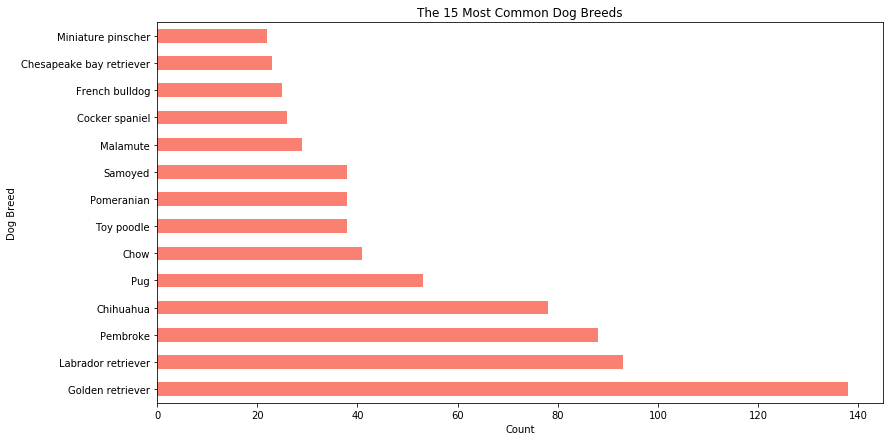

In [98]:
# Most common dog breeds
pop_dog_breeds = master_df.p1.value_counts()[:14]
pop_dog_breeds.plot(kind = 'barh', title = 'The 15 Most Common Dog Breeds', color='salmon', figsize=(13,7))
plt.xlabel('Count')
plt.ylabel('Dog Breed')
plt.title('The 15 Most Common Dog Breeds');

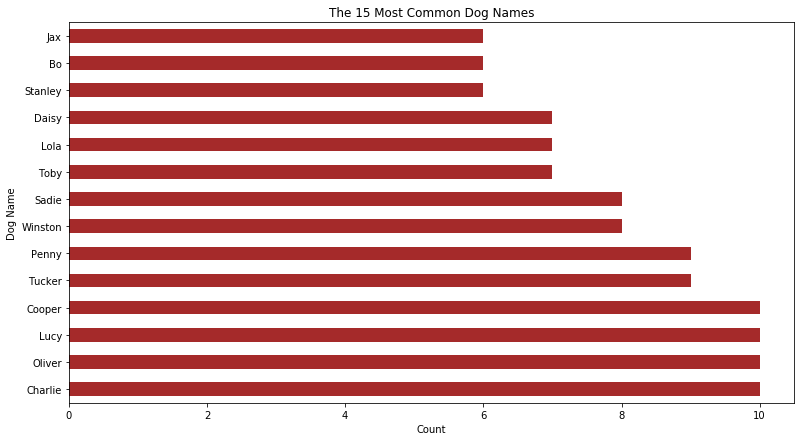

In [99]:
# Most common dog breeds
pop_dog_names = master_df.name.value_counts()[:14]
pop_dog_names.plot(kind = 'barh', title = 'The 15 Most Common Dog Names', color='brown', figsize=(13,7))
plt.xlabel('Count')
plt.ylabel('Dog Name')
plt.title('The 15 Most Common Dog Names');

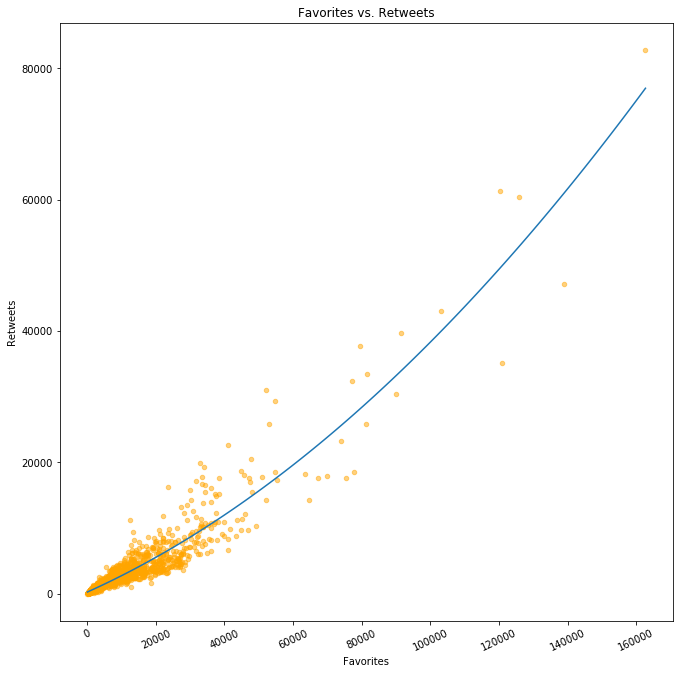

In [102]:
# Favorites vs. Retweets
master_df.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5, color = 'orange', figsize=(11,11));
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Favorites vs. Retweets')
plt.xticks(rotation=25)

# https://stackoverflow.com/questions/18767523/fitting-data-with-numpy/18767992
x = master_df.favorite_count
y = master_df.retweet_count
p = Polynomial.fit(x, y, 2)
plt.plot(*p.linspace());


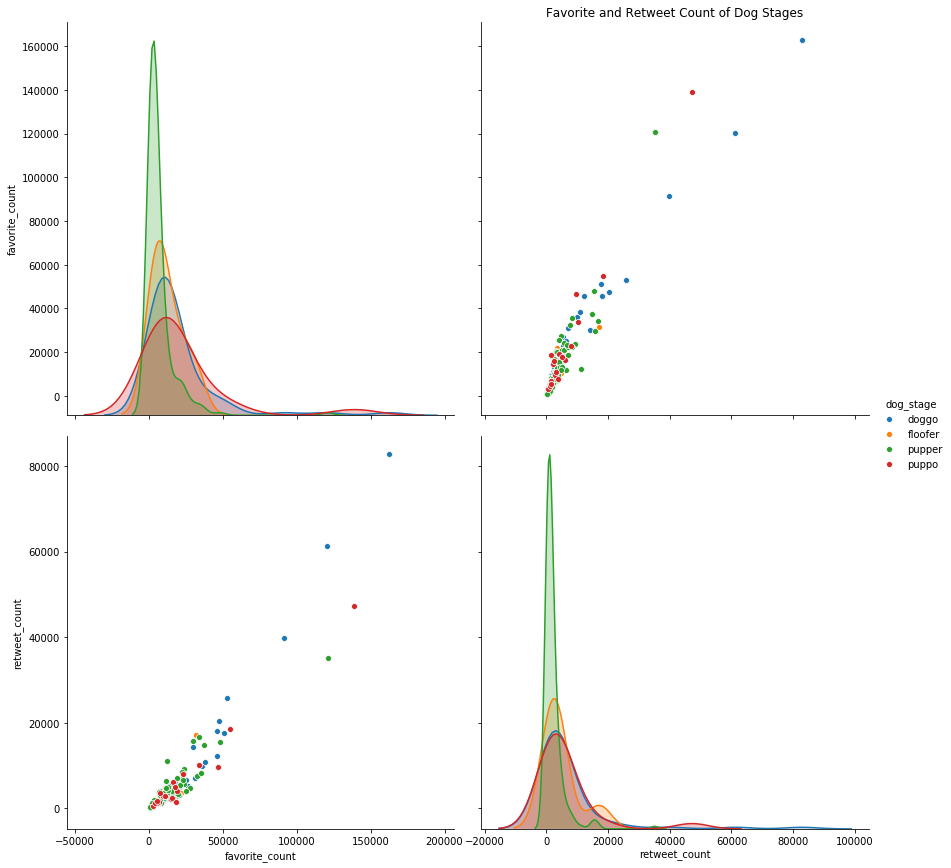

In [103]:
# Favorite and Retweet Count of Dog Stages
sns.pairplot(master_df, hue="dog_stage", vars=["favorite_count", "retweet_count"], height=6)
plt.title('Favorite and Retweet Count of Dog Stages');

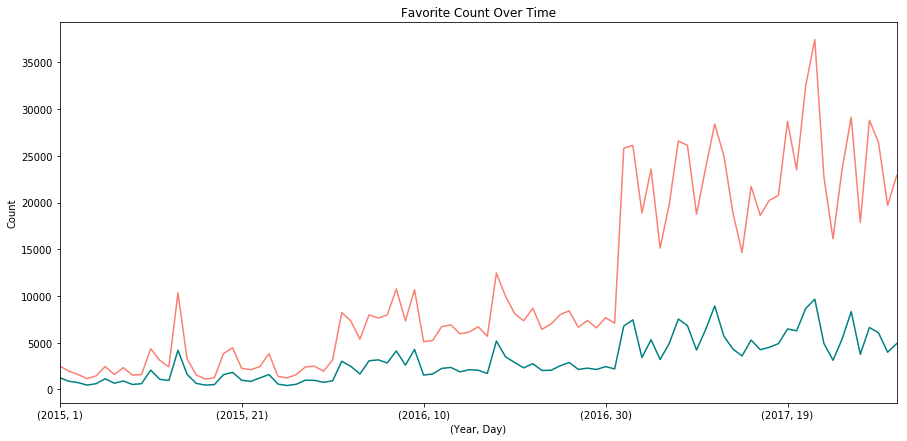

In [104]:
# Favorite count over time
master_df.favorite_count.groupby([master_df["timestamp"].dt.year, master_df["timestamp"].dt.day]).mean().plot(color='salmon', figsize=(15,7))
master_df.retweet_count.groupby([master_df["timestamp"].dt.year, master_df["timestamp"].dt.day]).mean().plot(color='teal')
plt.title('Favorite Count Over Time')
plt.ylabel('Count')
plt.xlabel('(Year, Day)');

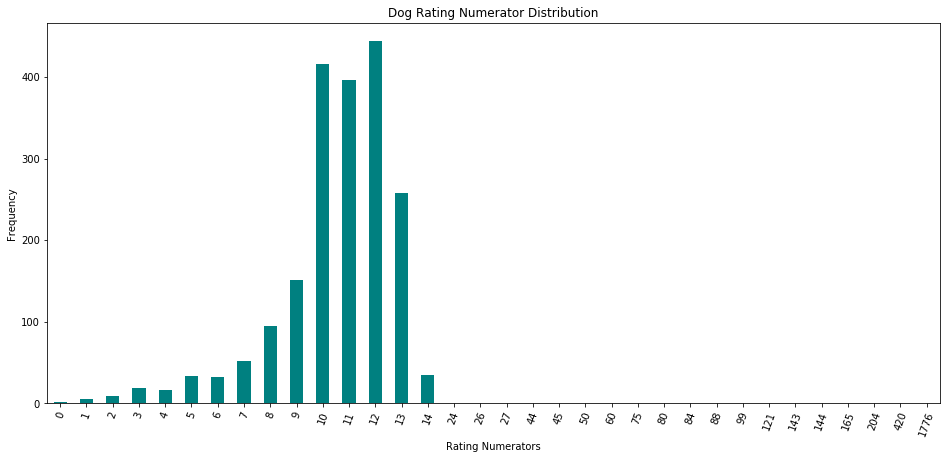

In [105]:
# Most common ratings
master_df.rating_numerator.value_counts().sort_index().plot('bar', figsize=(16,7), color='teal')
plt.xlabel('Rating Numerators')
plt.ylabel('Frequency')
plt.title('Dog Rating Numerator Distribution')
plt.xticks(rotation=70);

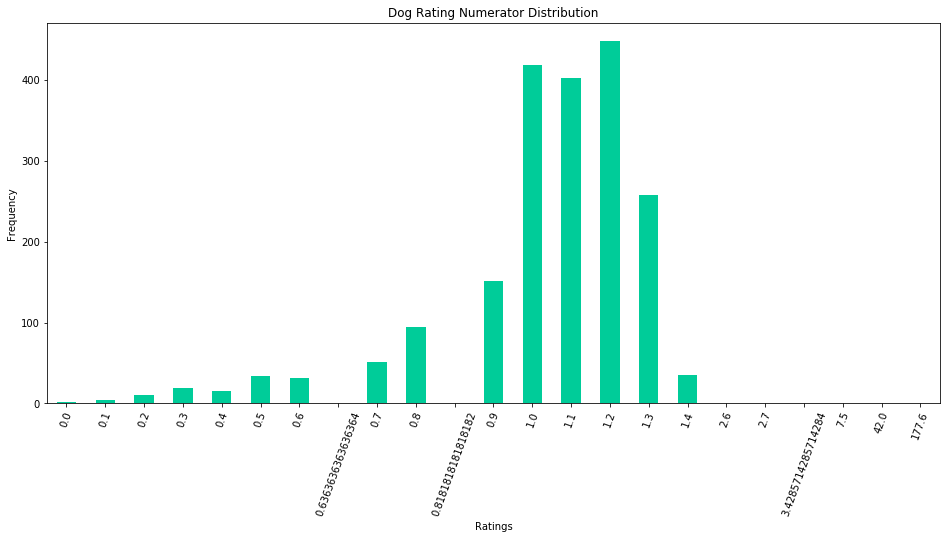

In [124]:
# Most common ratings
master_df.rating.value_counts().sort_index().plot('bar', figsize=(16,7), color='#00cc99')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Dog Rating Numerator Distribution')
plt.xticks(rotation=70);

<a id='conclusion'></a>
## Conclusion

>Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.

>Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

Throughout this notebook, we can see... 

A thorough explanation of .. can be found in `wrangle_report.pdf` and more detail into .. can be found in `act_report.pdf`. 